In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

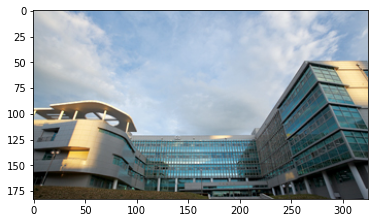

array([[[196, 197, 199],
        [199, 201, 200],
        [202, 204, 203],
        ...,
        [156, 176, 200],
        [161, 179, 201],
        [164, 182, 204]],

       [[193, 194, 198],
        [196, 197, 199],
        [200, 202, 201],
        ...,
        [158, 178, 202],
        [161, 179, 201],
        [164, 182, 204]],

       [[190, 193, 198],
        [191, 195, 198],
        [198, 199, 201],
        ...,
        [159, 179, 203],
        [162, 180, 202],
        [165, 183, 205]],

       ...,

       [[ 50,  41,  24],
        [ 44,  37,  21],
        [ 38,  32,  18],
        ...,
        [ 98, 108, 120],
        [102, 110, 123],
        [108, 116, 129]],

       [[ 51,  41,  31],
        [ 56,  48,  37],
        [ 52,  46,  34],
        ...,
        [ 92, 102, 114],
        [ 98, 105, 121],
        [103, 110, 126]],

       [[ 50,  43,  27],
        [ 51,  41,  29],
        [ 45,  37,  24],
        ...,
        [ 90, 100, 112],
        [ 94, 103, 118],
        [ 98, 107, 122]]

In [3]:
filename = "input.jpg"
read_file(filename)

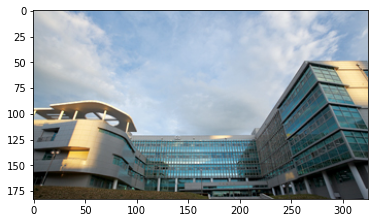

In [4]:
filename = "input.jpg"
img = read_file(filename)

# Create Edge Mask

In [5]:
def edge_mask(img, line_size, blur_value):
    #Input Image -> Edges of Images
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glay_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(glay_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

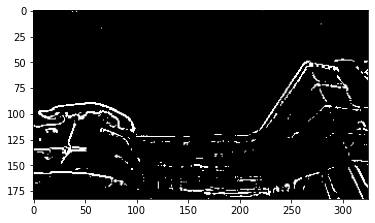

In [6]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = "binary")
plt.show()

# Reduce the Color Palette

In [7]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    # Implementing K_Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

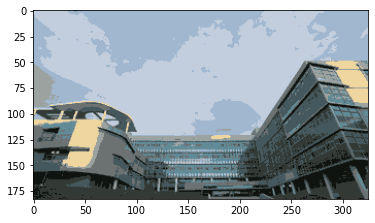

In [8]:
img = color_quantization(img, k=9)

plt.imshow(img)
plt.show()

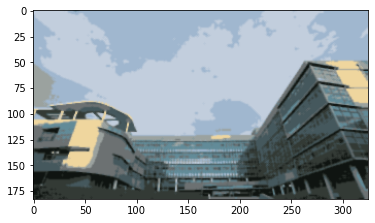

In [9]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with the quantiz img

In [10]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    
    plt.imshow(c)
    plt.show()

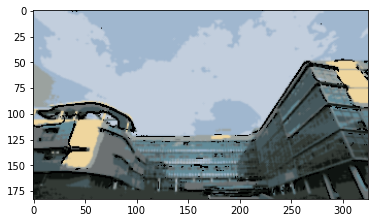

In [11]:
cartoon()